In [2]:
import numpy as np
import pandas as pd
import os

import PIL
!pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 492.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.0 MB 660.6 kB/s eta 0:09:43
   ---------------------------------------- 0.1/385.0 MB 550.5 kB/s eta 0:11:40
   ---------------------------------------- 0.1/385.0 MB 573.4 kB/s eta 0:11:12
   ---------------------------------------- 0.1/385.0 MB 547.6 kB/s eta 0:11:43
   ---------------------------

In [23]:
image_normal = PIL.Image.open("../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/NORMAL/IM-0001-0001.jpeg")

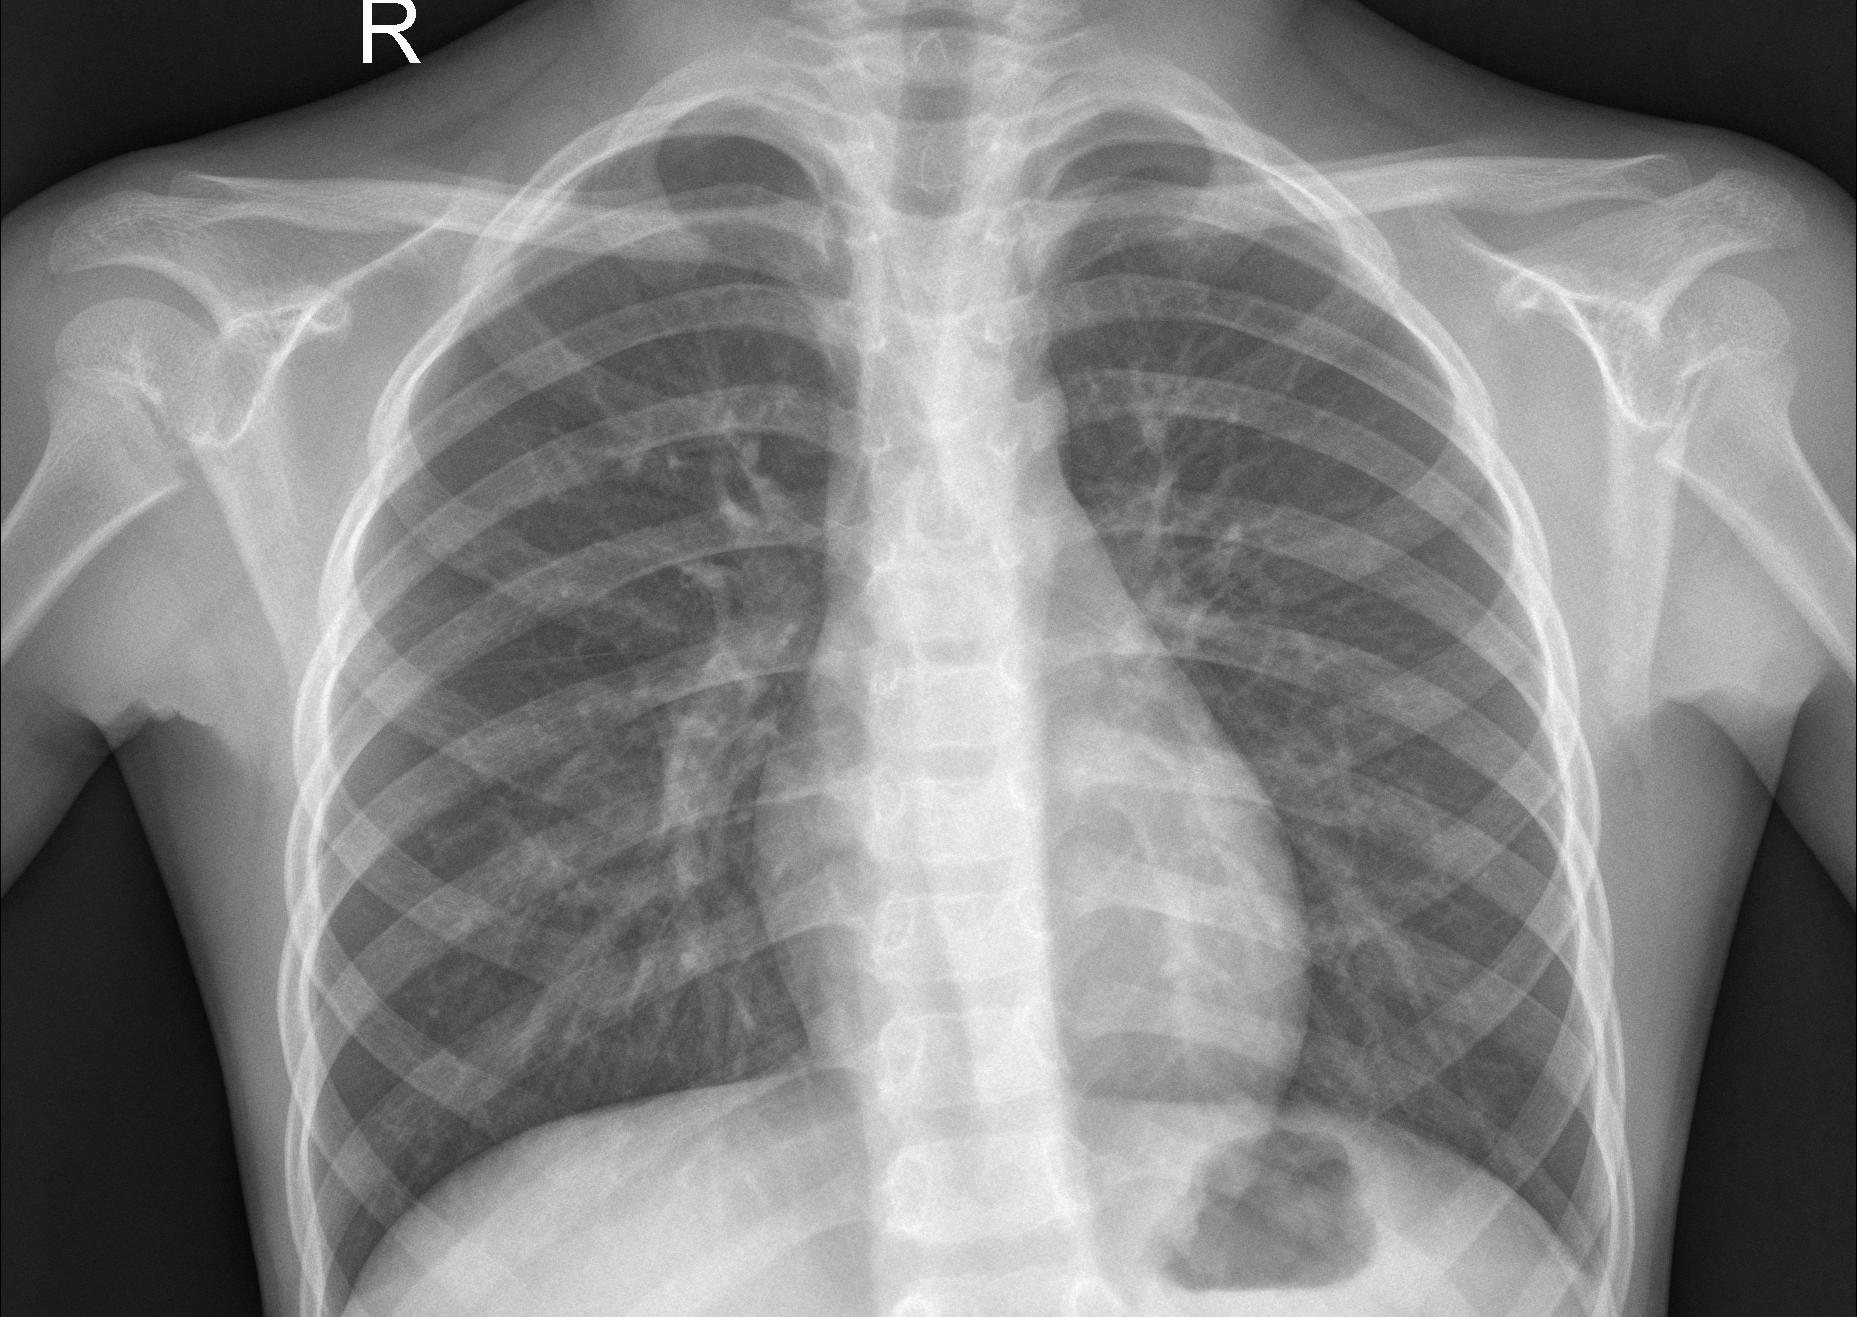

In [17]:
image_normal

In [24]:
image_pneumonia = PIL.Image.open("../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg")

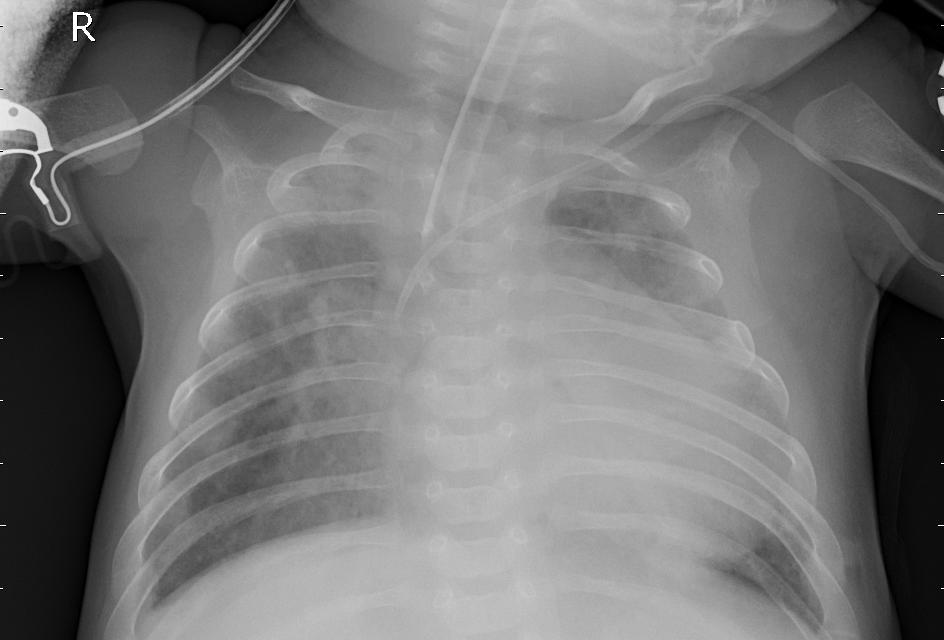

In [25]:
image_pneumonia

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
training_dir = "../Pneumonia-Detection-Using-Deep-Learning/chest_xray/train/"
training_generator = ImageDataGenerator(rescale=1/255)
data_train = training_generator.flow_from_directory(training_dir,target_size=(120,120),batch_size = 8,class_mode="binary")

Found 5216 images belonging to 2 classes.


In [30]:
valid_dir = "../Pneumonia-Detection-Using-Deep-Learning/chest_xray/val/"
validation_generator = ImageDataGenerator(rescale=1/255)
data_valid = validation_generator.flow_from_directory(valid_dir,target_size=(120,120),batch_size = 8,class_mode="binary")

Found 16 images belonging to 2 classes.


In [31]:
test_dir = "../Pneumonia-Detection-Using-Deep-Learning/chest_xray/test/"
test_generator = ImageDataGenerator(rescale=1/255)
data_test = test_generator.flow_from_directory(test_dir,target_size=(120,120),batch_size = 8,class_mode="binary")

Found 624 images belonging to 2 classes.


# CNN

In [33]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3), input_shape=(120,120,3), activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(512, (3,3), activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256, activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")])

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 118, 118, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 59, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 57, 57, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,700,161 (6.49 MB)

 Trainable params: 1,700,161 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["acc"])


In [39]:
history = model.fit(data_train, epochs=2, validation_data=data_valid)

Epoch 1/2


C:\Users\bened\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


652/652 ━━━━━━━━━━━━━━━━━━━━ 116s 173ms/step - acc: 0.7729 - loss: 0.5093 - val_acc: 0.8125 - val_loss: 0.3748
Epoch 2/2
652/652 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - acc: 0.9411 - loss: 0.1546 - val_acc: 0.9375 - val_loss: 0.1204


In [41]:
model.evaluate(data_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - acc: 0.8524 - loss: 0.3905


[0.4164125919342041, 0.8445512652397156]

In [42]:
predictions = model.predict(data_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step


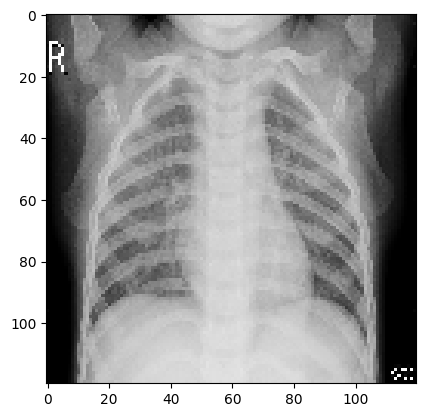

The probability of pneumonia is: [0.8573556]


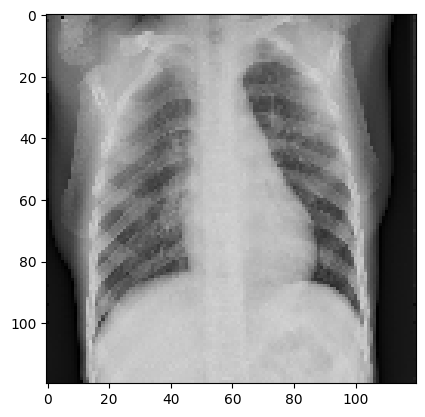

The probability of pneumonia is: [0.9836854]


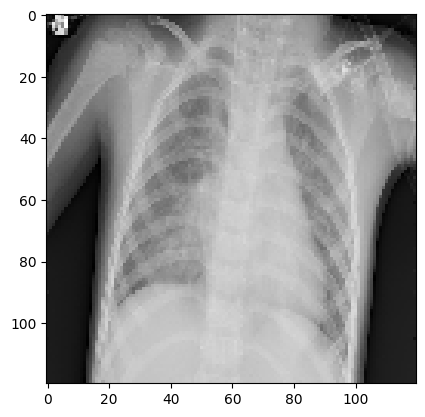

The probability of pneumonia is: [0.52389765]


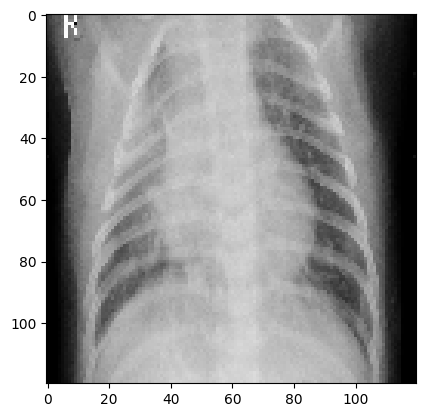

The probability of pneumonia is: [0.7914181]


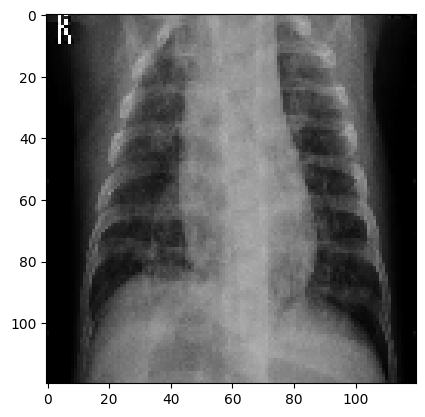

The probability of pneumonia is: [0.95805717]


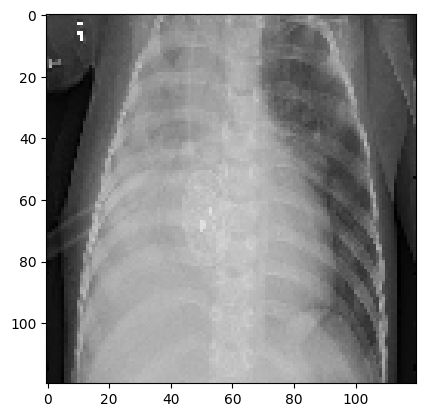

The probability of pneumonia is: [0.6889507]


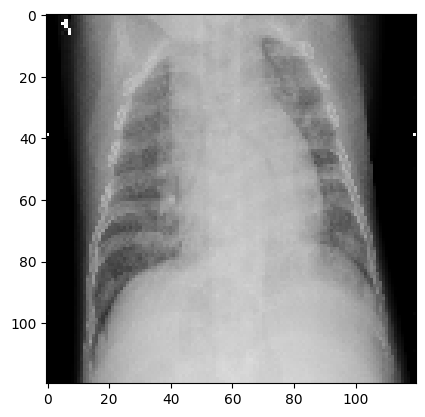

The probability of pneumonia is: [0.98827624]


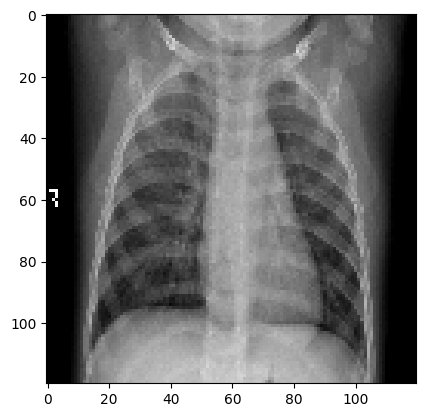

The probability of pneumonia is: [0.6931243]


In [46]:
# Use the next() function to get the next batch of data
x = next(data_test)  # This will return a tuple (images, labels)

# Extract the images from the batch
images = x[0]  # x[0] contains the images

# Loop through the images and display the first 8
for i in range(0, 1):  # This loop only runs once, so it can be simplified
    image = images  # No need to use x[i] since images are already extracted
    for j in range(0, 8):
        plt.imshow(image[j], cmap='gray')  # Add cmap='gray' if images are grayscale
        plt.show()
        print("The probability of pneumonia is:", predictions[j])